# 파이썬 3.7 이상

In [2]:
import sys
assert sys.version_info >= (3, 7)

In [3]:
sys.version_info

sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)

사이킷런이 1.0.1 이상

In [7]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

폰트크기를 지정

In [8]:
import matplotlib.pyplot as plt
plt.rc('font',size=12)
plt.rc('axes',titlesize=14)
plt.rc('axes',labelsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

출력 결과를 일정하게 유지하기위해서 랜덤시드를 지정

In [9]:
import numpy as np
np.random.seed(42)

In [31]:
lifesat

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6
5,Portugal,32181.154537,5.4
6,Poland,32238.157259,6.1
7,Estonia,35638.421351,5.7
8,Spain,36215.447591,6.3
9,Slovenia,36547.738956,5.9


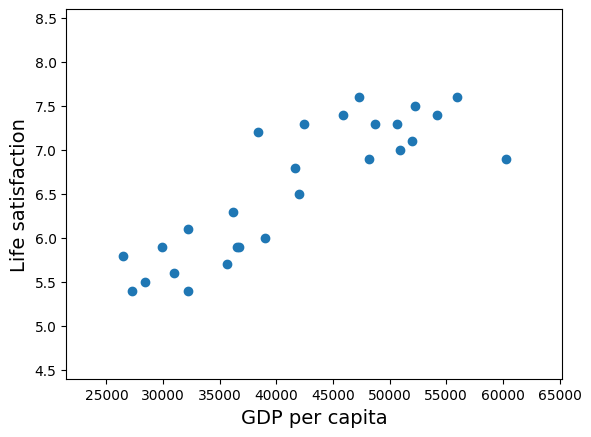

[5.94694293]


In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# 데이터 다운로드
url = "https://raw.githubusercontent.com/ageron/data/main/lifesat/lifesat.csv"
lifesat = pd.read_csv(url)
X = lifesat.iloc[:,1].to_numpy()
y = lifesat.iloc[:,2].to_numpy()
# 그래프를 그린다
plt.scatter(X,y)
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")
plt.xlim(np.min(X)-5000,np.max(X)+5000)
plt.ylim(np.min(y)-1,np.max(y)+1)
plt.show()

# 선형모델을 선택
model = LinearRegression()
# 모델을 훈련
model.fit(X.reshape(-1,1),y)
# 예측을 만든다
32,422.57 # 우리나라 1인당 gdp
X_new = np.array([[32422.57]])
y_pred = model.predict(X_new)
print(y_pred)


In [34]:
# k 최근접이웃 알고리즘으로 변경
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X.reshape(-1,1),y)
y_pred = model.predict(X_new)
print(y_pred)

[5.7]


삶의 만족도 데이터 로드

In [37]:
url = 'https://raw.githubusercontent.com/ageron/data/main/lifesat/gdp_per_capita.csv'
gdp = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/ageron/data/main/lifesat/oecd_bli.csv'
oecd = pd.read_csv(url)
oecd

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.40,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.50,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.70,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.00,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,0.54,NaN,NaN
2365,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,32.09,NaN,NaN
2366,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,0.67,NaN,NaN
2367,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,19.37,NaN,NaN


In [51]:
# 2020년 데이터만 추출
gdp_2020 = gdp[gdp['Year'] == 2020]
gdp_2020.set_index('Entity',inplace=True)
gdp_2020

,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
Entity,,,
Afghanistan,AFG,2020,1978.961579
Africa Eastern and Southern,NaN,2020,3387.594670
Africa Western and Central,NaN,2020,4003.158913
Albania,ALB,2020,13295.410885
Algeria,DZA,2020,10681.679297
...,...,...,...
Vanuatu,VUT,2020,2762.791388
Vietnam,VNM,2020,8200.331867
World,OWID_WRL,2020,16194.040310


In [49]:
oecd = oecd[oecd['INEQUALITY'] == 'TOT']
oecd = oecd.pivot(index='Country',columns='Indicator',values='Value')
oecd.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [52]:
# 삶의 만족도 데이터, gdp데이터를 합친뒤에 1인당 gdp 열과 삶의 만족도 열만 남긴다

In [61]:
full_country_stats = pd.merge(left=gdp_2020,right=oecd,how='inner',left_index=True,right_index=True)
gdppc_col = 'GDP per capita, PPP (constant 2017 international $)'
lifesat_col = "Life satisfaction"
full_country_stats.sort_values(by=gdppc_col,inplace=True)
full_country_stats = full_contry_states[[gdppc_col,lifesat_col]]
full_country_stats.head()


,"GDP per capita, PPP (constant 2017 international $)",Life satisfaction
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


In [63]:
#과대 적합에 대한 예시를 만들기 위해서 1인당 gdp가 min_gdp ~ max_gdp 사이에 있는 나라들만 사용
# 나중에 누락된 나라들만 추가해서 동일한 트랜드를 따르지 않는다
min_gdp = 23_500
max_gdp = 62_500
country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

,"GDP per capita, PPP (constant 2017 international $)",Life satisfaction
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


In [65]:
model = LinearRegression()
model.fit(country_stats[gdppc_col].values.reshape(-1,1),country_stats[lifesat_col].values)
X_new = np.array([[32422.57]])
y_pred = model.predict(X_new)
print(y_pred)

[5.94694293]
